In [1]:
!pip install wordcloud


In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Gdrive file path
file_path = '/content/drive/My Drive/Colab Notebooks/NLP_Visualization/ProcessedCommentsAll.csv'

# Get the data
df = pd.read_csv(file_path)

df.head()


Mounted at /content/drive


,articleID,cleaned_commentBody,neg,neu,pos,keywords
0,58def1347c459f24986d7c80,This project makes me happy to be a 30+ year T...,0.000,0.635,0.365,project makes happy year subscriber continue i...
1,58def1347c459f24986d7c80,Stunning photos and reportage. Infuriating tha...,0.226,0.677,0.096,Stunning photos reportage Infuriating admistra...
2,58def1347c459f24986d7c80,Brilliant work from conception to execution. I...,0.088,0.773,0.139,Brilliant work conception execution never seen...
3,58def1347c459f24986d7c80,NYT reporters should provide a contributor's l...,0.091,0.695,0.214,reporters provide contributor link crowdfundin...
4,58def1347c459f24986d7c80,Could only have been done in print. Stunning.,0.000,0.729,0.271,only done print Stunning


In [3]:
df.tail()

,articleID,cleaned_commentBody,neg,neu,pos,keywords
2176359,5930ae877c459f24986e2f33,C'mon Connecticut...let's add ourselves to the...,0.000,1.000,0.000,C'm let add list
2176360,5930ae877c459f24986e2f33,Write or call Hickenlooper's office! It was on...,0.000,1.000,0.000,Write call office first things did yesterday h...
2176361,5930ae877c459f24986e2f33,"C'mon North Carolina! -- oh, who am I kidding.",0.000,0.825,0.175,C'm kidding
2176362,5930ae877c459f24986e2f33,"California is the federal government's #1 ""don...",0.030,0.786,0.184,federal government donor state sending hundred...
2176363,5930ae877c459f24986e2f33,Or stop Earth First . . .,0.268,0.732,0.000,stop


In [4]:
df.describe()

,neg,neu,pos
count,2.176364e+06,2.176364e+06,2.176364e+06
mean,9.325652e-02,7.959166e-01,1.108254e-01
std,9.030105e-02,1.218327e-01,1.039041e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e-02,7.330000e-01,4.300000e-02
50%,7.900000e-02,8.030000e-01,9.500000e-02
75%,1.390000e-01,8.700000e-01,1.530000e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


# Exploratory analysis: The distribution among comment's different emotions.

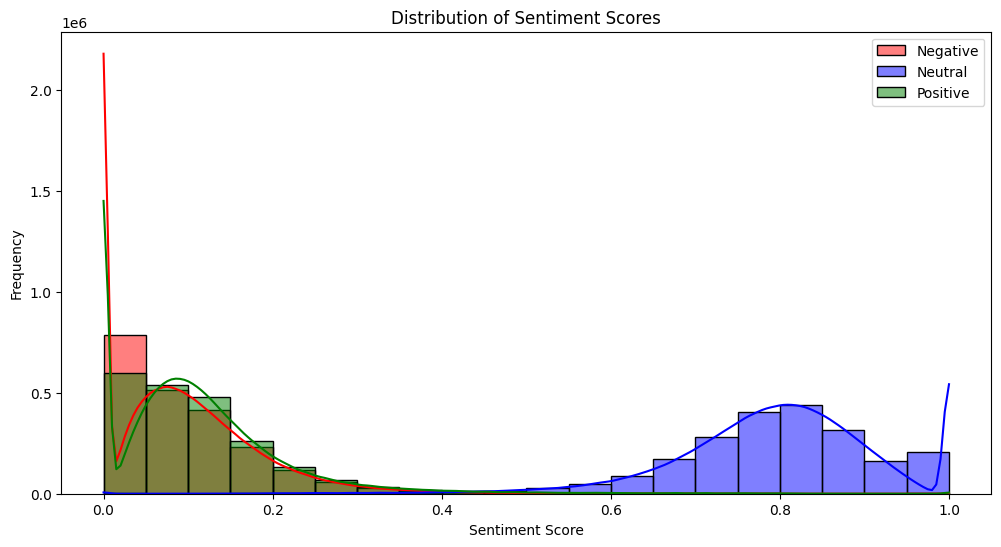

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Emotion Distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['neg'], color='red', label='Negative', kde=True, bins=20)
sns.histplot(df['neu'], color='blue', label='Neutral', kde=True, bins=20)
sns.histplot(df['pos'], color='green', label='Positive', kde=True, bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


From this distribution of sentiment scores, we can draw the following conclusions:

1, Concentrated Distribution of Negative Sentiment:
the negative sentiment scores (in red) are mainly concentrated close to zero. That is, most of the reviews have low negative sentiment scores. This may mean that the comments do not have a strong negative sentiment tendency in general.

2, Neutral Sentiment occupies a larger proportion: Neutral Sentiment scores (blue) occupy a larger area of the overall distribution, with a significant concentration especially in the higher scores (between 0.5 and 0.9). This indicates that a larger proportion of the content of the comments was judged to be neutral sentiment. Most of the content of the comments is likely to be relatively objective or not displaying particularly strong emotions.

3, Positive sentiment is more evenly distributed: positive sentiment scores (green) are more dispersed relative to negative sentiment scores, but are low overall. This suggests that while positive sentiment is present in the reviews, the intensity is mostly not very high. Overall, the positive sentiment of the comments is likely to be more moderate.

4, Low intensity of sentiment is prevalent: the overall distribution suggests that the vast majority of comments have low sentiment scores (both positive and negative). This may mean that comments are mostly neutral or mild in tone, and that comments with strong sentiment (scores close to 1) are relatively rare.

### Overall, this graph shows that the overall sentiment tendency of comments is more moderate and dominated by neutral sentiment. This distribution may reflect commenters' neutral or mild reactions to the content of the article, rather than extreme emotions.


# Exploratory analysis: The distribution among comment's different emotions. In specific comments.

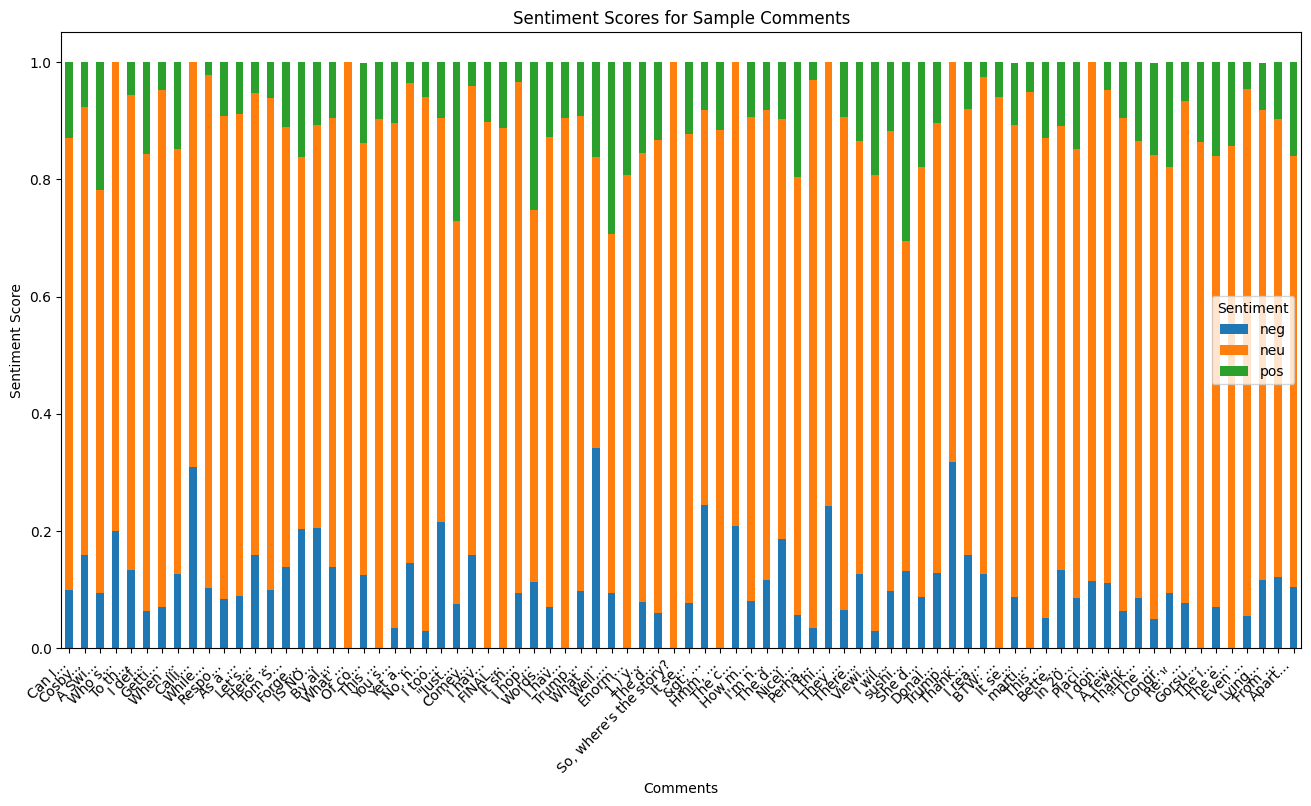

In [6]:

import matplotlib.pyplot as plt
# Get random samples
sample_df = df.sample(80, random_state=42).reset_index()

# Limiting the words for visualization
sample_df['short_comment'] = sample_df['cleaned_commentBody'].apply(lambda x: x[:5] + '...' if len(x) > 30 else x)

# Creating plot
fig, ax = plt.subplots(figsize=(16, 8))
sample_df[['neg', 'neu', 'pos']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(sample_df['short_comment'], rotation=45, ha='right')
plt.title("Sentiment Scores for Sample Comments")
plt.xlabel("Comments")
plt.ylabel("Sentiment Score")
plt.legend(title="Sentiment")
plt.show()


From this graph, we can draw the following conclusions:

1, Neutral Sentiment Dominates: the majority of reviews have a large percentage of neutral scores (orange), indicating that the content of these reviews tends to be neutral or lacks strong sentiment. This is consistent with the previous overall distribution graph, which suggests that the comments are more moderate or neutral overall.

2, Positive sentiment is more moderate: some comments contain high positive scores (green), but generally not more than a third of the total sentiment score. This suggests that the positive sentiment in the comments is usually not as strong, and is more often expressed as mild positive emotion.

3, A lower proportion of negative sentiment: there are relatively few negative sentiment scores (blue) compared to neutral and positive sentiment, and only a few comments contain more overtly negative scores. This may indicate that although a few comments contain negative sentiment, the overall intensity of negative sentiment is not high.

4, Individual comments have significant differences in sentiment: in some comments (e.g. those containing higher negative scores), a greater difference between neutral and negative sentiment can be seen. This may indicate that there is some dissatisfaction or criticism of certain topics or events in these comments, but overall negative sentiment is still in the minority.

### Overall, this graph further confirms that the overall sentiment of the comments is skewed towards neutral and mildly positive sentiment, with only a small number of comments showing significant negative sentiment. This may reflect a high level of acceptance of the topic by the commenters, or that the topic discussed did not elicit a strong emotional response.


# Exploratory analysis: The relation between comment's length and emotions.

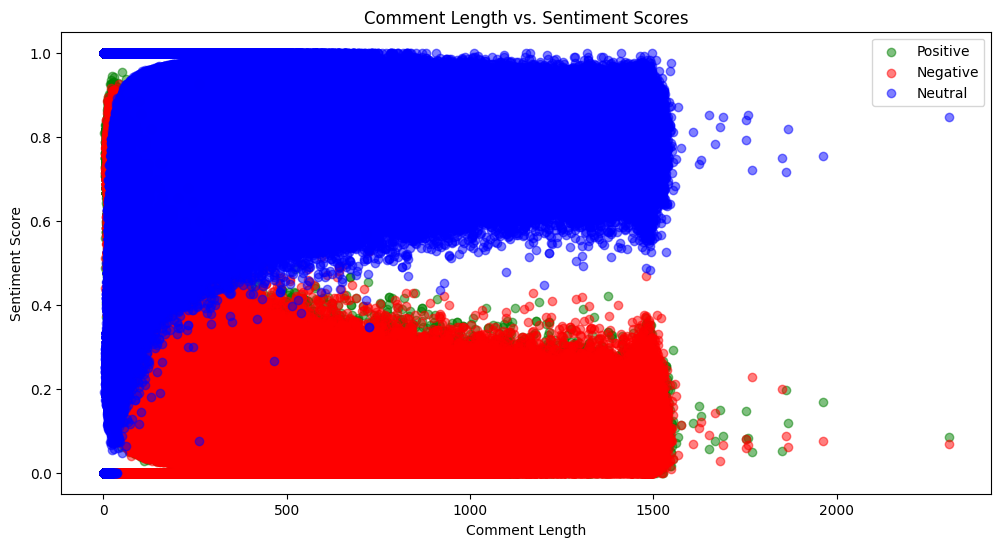

In [7]:
# Forces the value in the cleaned_commentBody column to be converted to a string type and then calculates the length
df['comment_length'] = df['cleaned_commentBody'].astype(str).apply(len)

# Plotting Scatterplots of Comment Length vs. Sentiment Score
plt.figure(figsize=(12, 6))
plt.scatter(df['comment_length'], df['pos'], alpha=0.5, color='green', label='Positive')
plt.scatter(df['comment_length'], df['neg'], alpha=0.5, color='red', label='Negative')
plt.scatter(df['comment_length'], df['neu'], alpha=0.5, color='blue', label='Neutral')
plt.title("Comment Length vs. Sentiment Scores")
plt.xlabel("Comment Length")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()


The following conclusions can be drawn from this graph:

1, Neutral Sentiment Dominates: the graph shows a large number of neutral sentiment scores (in blue) and covers almost the entire range of comment lengths. This suggests that the vast majority of comments have neutral sentiment, and that neutral sentiment scores are generally high regardless of comment length.

2, Concentration of negative sentiment for short comments: in the region of shorter comment lengths (roughly under 500 characters), we can see a clear distribution of negative sentiment (red). This could mean that users are more inclined to express negative emotions in short comments.

3, The association between comment length and positive sentiment is weaker: positive sentiment scores (green) are distributed more dispersed in the graph, with no particularly concentrated pattern, suggesting that the expression of positive sentiment seems to be independent of comment length, and that users can express positive sentiment in comments of any length.

4, High percentage of neutral sentiment in longer comments: the neutral sentiment score remains high as the length of comments increases. This may indicate that users are more likely to use neutral or objective language in discussions rather than strong expressions of emotion when comments are more informative.

5, Fewer extreme emotions: the low number of comments with scores close to 1 for both negative and positive emotions suggests that there are not many comments with strong emotions, and that the majority of comments are distributed in the low to medium range of emotions.

###Overall, this graph shows that users mostly maintain neutral emotions in their comments, while shorter comments are more likely to express negative emotions, and positive emotions do not correlate well with comment length.

# Exploratory analysis: The distribution between time and comment's emotions. （暂时做不了）

# Exploratory analysis: The wordcloud
Using wordcloud to show the high intensity words in the datasets. Among positive, negative and neutral.

Word's size stands for frequecy, word's color purity stands for emotion intensity.

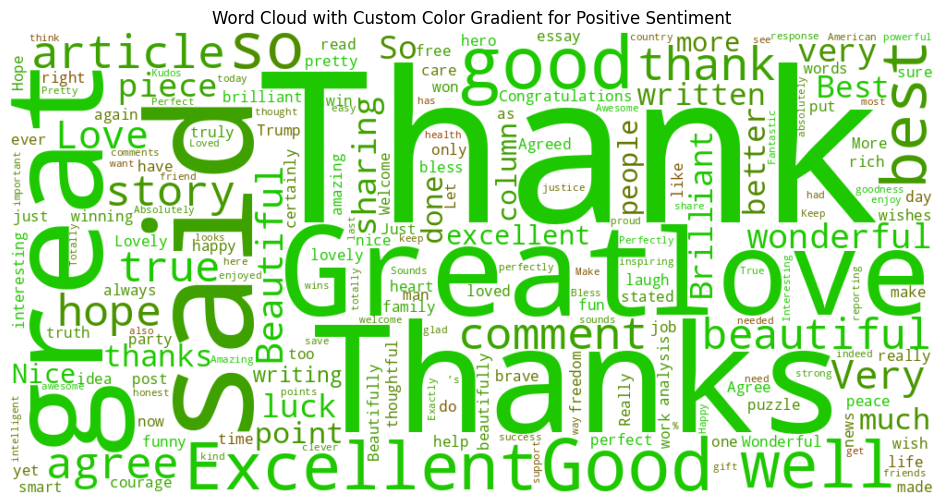

In [8]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select comments with positive sentiment scores above a certain threshold (e.g., 0.5)
high_pos_comments = df[df['pos'] > 0.5]

# Extract keywords from these comments
high_pos_keywords = ' '.join(high_pos_comments['keywords'].dropna())
high_pos_word_freq = Counter(high_pos_keywords.split())

# Create a sentiment intensity dictionary for each keyword
word_intensity = {}
for _, row in high_pos_comments.iterrows():
    for word in str(row['keywords']).split():
        word_intensity[word] = max(word_intensity.get(word, 0), row['pos'])

# Define a linear interpolation function that maps intensity between two colors.
def blend_color(intensity, start_color, end_color):

    return tuple(int(start + (end - start) * intensity) for start, end in zip(start_color, end_color))

# Define a color function that maps mood intensity from 0.5-1.0 to a range of 0-1
def intensity_color_func(word, **kwargs):
    raw_intensity = word_intensity.get(word, 0.5)
    # Maps the range from 0.5-1.0 to 0-1
    intensity = (raw_intensity - 0.5) * 2 if raw_intensity >= 0.5 else 0
    # Define start color and end color
    start_color = (200, 0, 0)
    end_color = (30, 200, 0)
    # Get the color mix
    blended_color = blend_color(intensity, start_color, end_color)
    return f"rgb{blended_color}"

# Create word clouds where word size is controlled by word frequency
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(high_pos_word_freq)

# Display word cloud, apply color function
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=intensity_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Color Gradient for Positive Sentiment")
plt.show()


Positive Sentiment Word Cloud: Some common positive words such as “thank”, “great”, “good”, “love”, “excellent”, and “beautiful” can be seen in the Positive Sentiment Word Cloud, which express positive emotions of the readers. The positive emotion word cloud mainly shows the emotions of gratitude, appreciation, and praise, indicating that these emotions are common in positive comments. The size of the words indicates that these words are more frequent, showing their importance in the expression of positive emotions.

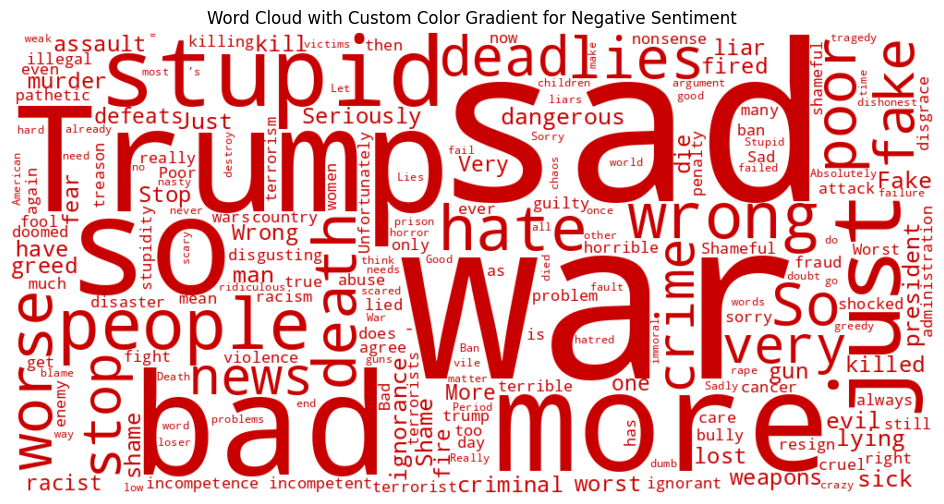

In [9]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 选择正面情感得分高于某个阈值的评论（例如0.5）
high_pos_comments = df[df['neg'] > 0.5]

# 将这些评论中的关键词提取出来
high_pos_keywords = ' '.join(high_pos_comments['keywords'].dropna())
high_pos_word_freq = Counter(high_pos_keywords.split())

# 为每个关键词创建一个情绪强度字典，基于 `pos` 值
word_intensity = {}
for _, row in high_pos_comments.iterrows():
    for word in str(row['keywords']).split():
        word_intensity[word] = max(word_intensity.get(word, 0), row['pos'])

# 定义线性插值函数，将 intensity 映射到两个颜色之间
def blend_color(intensity, start_color, end_color):
    # start_color 和 end_color 是 RGB 颜色，例如 (255, 200, 200)
    return tuple(int(start + (end - start) * intensity) for start, end in zip(start_color, end_color))

# 定义颜色函数，将情绪强度从 0.5-1.0 映射到 0-1 范围
def intensity_color_func(word, **kwargs):
    raw_intensity = word_intensity.get(word, 0.5)  # 默认值为 0.5
    # 将范围从 0.5-1.0 映射到 0-1
    intensity = (raw_intensity - 0.5) * 2 if raw_intensity >= 0.5 else 0
    # 定义起始颜色和结束颜色
    start_color = (200, 0, 0)
    end_color = (30, 200, 0)
    # 获取混合颜色
    blended_color = blend_color(intensity, start_color, end_color)
    return f"rgb{blended_color}"

# 创建词云，词的大小由词频控制
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(high_pos_word_freq)

# 显示词云，应用颜色函数
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=intensity_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Color Gradient for Negative Sentiment")
plt.show()


Negative Sentiment Word Cloud: the negative sentiment word cloud on the other hand highlights words such as “trump”, “war”, “wrong”, “bad”, and “hate”, showing the negative sentiments of the readers. Negative emotions are mainly focused on the emotions of criticism, negative comments, and anger, indicating that these emotions dominate the negative comments. The frequent occurrence of these words also shows their importance in expressing dissatisfaction or upset.

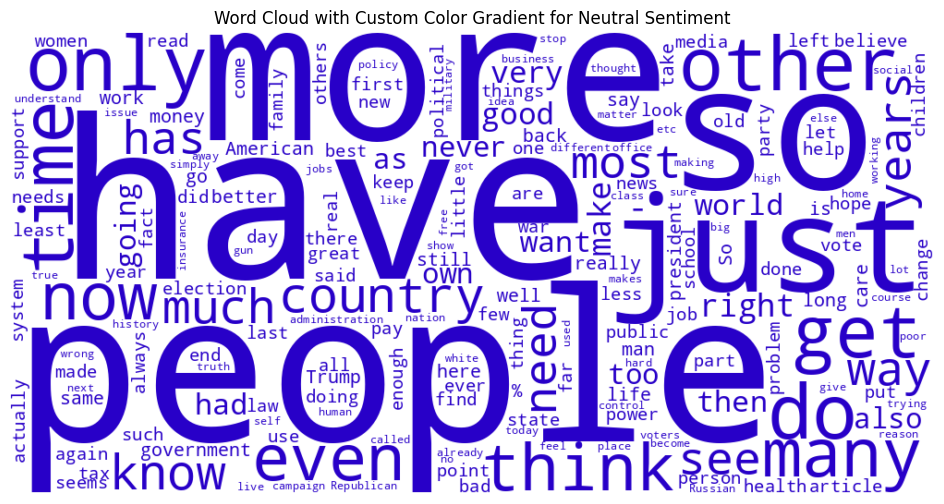

In [10]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 选择正面情感得分高于某个阈值的评论（例如0.5）
high_pos_comments = df[df['neu'] > 0.5]

# 将这些评论中的关键词提取出来
high_pos_keywords = ' '.join(high_pos_comments['keywords'].dropna())
high_pos_word_freq = Counter(high_pos_keywords.split())

# 为每个关键词创建一个情绪强度字典，基于 `pos` 值
word_intensity = {}
for _, row in high_pos_comments.iterrows():
    for word in str(row['keywords']).split():
        word_intensity[word] = max(word_intensity.get(word, 0), row['pos'])

# 定义线性插值函数，将 intensity 映射到两个颜色之间
def blend_color(intensity, start_color, end_color):
    # start_color 和 end_color 是 RGB 颜色，例如 (255, 200, 200)
    return tuple(int(start + (end - start) * intensity) for start, end in zip(start_color, end_color))

# 定义颜色函数，将情绪强度从 0.5-1.0 映射到 0-1 范围
def intensity_color_func(word, **kwargs):
    raw_intensity = word_intensity.get(word, 0.5)  # 默认值为 0.5
    # 将范围从 0.5-1.0 映射到 0-1
    intensity = (raw_intensity - 0.5) * 2 if raw_intensity >= 0.5 else 0
    # 定义起始颜色和结束颜色
    start_color = (40, 0, 200)
    end_color = (200, 200, 0)
    # 获取混合颜色
    blended_color = blend_color(intensity, start_color, end_color)
    return f"rgb{blended_color}"

# 创建词云，词的大小由词频控制
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(high_pos_word_freq)

# 显示词云，应用颜色函数
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=intensity_color_func), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Custom Color Gradient for Neutral Sentiment")
plt.show()


Neutral emotion word cloud: The neutral emotion word cloud mainly contains some descriptive or informative words, such as “people”, “have”, “more”, “just”, “know”, “country”, etc. These words are usually used to describe the facts or make neutral points. The lack of strong emotional words in the Neutral Emotional Word Cloud suggests that neutral comments focus more on the descriptive nature of the content and the delivery of information rather than the expression of emotion.

## Based on the distribution of time points in these datasets, we can draw some conclusions about sentiment and events in conjunction with word cloud analysis. Here are some possible observations:

### Sentiment tendencies in specific time periods:
The dataset contains article and comment data from different months of 2017 and 2018, which can often be used to analyze annual or quarterly sentiment changes. For example, if negative words such as “war” or “hate” appear frequently in a word cloud in a given month, it may reflect a major negative event at that time, such as an international conflict or social injustice.
The high frequency of positive words such as “thank” and “great” in certain months may be due to positive news events or celebrations. For example, in April or May, positive sentiments associated with holidays or celebrations (e.g., Labor Day) may occur.

### Yearly Change:
By comparing data from 2017 and 2018, we can get a sense of how public sentiment has trended over the two years. For example, if positive sentiment terms increased significantly in 2018, it may reflect an increase in positive public sentiment toward certain events during the year, possibly due to an improving economy, policy changes, or the influence of important people.
If there was a significant increase in negative sentiment in 2018, such as words related to “politics” or “scandal,” it may indicate that there was more negative sentiment over the course of the year, triggered by controversial events or social issues.

### Event-driven mood swings:
During months when important events occur (e.g., election season, major holidays, economic policy announcements), commentary and sentiment words may focus on related topics. For example, if a word cloud in March or May has a large number of political or economic words that may be related to policy announcements or elections, sentiment may be more intense in those months.
Negative words such as “fake news” and “crime” may appear in high frequency after certain political events or social hotspots, and these negative sentiments usually reflect public disappointment or anger.

### Quarterly summaries:
Analyzing on a quarterly basis can help understand the public's reaction to quarterly events. For example, at the beginning or end of the year, there may be more positive words such as “hope” and “happy” due to New Year's celebrations or year-end summaries. In the third quarter, on the other hand, there may be more work- or economy-related words, reflecting public sentiment about economic performance or job stress.
Holiday effects in the dataset:

The dataset contains data from the spring (April, May) and winter (January) months, and it is possible to observe whether these periods are characterized by sentiment fluctuations due to holidays. For example, winter comments may have more positive words about family and holidays, while spring may have emotional words about vacations and leisure activities.

##Based on word cloud analysis and the theory of time points in the data set, here are some highlights of possible keyword-event associations:

### January 2017 - Trump inauguration. Keywords: “trump”, “fake news”, “protest”, “change ”, “policy”
EVENT: President Trump's inauguration triggers widespread public discussion and protests, with much discussion of “fake news” in the news, and a mix of public expectations and skepticism about new policies.

### March 2017 - Health Bill Controversy. Keywords: “healthcare”, “law”, “rights”, “protests ”
EVENT: The U.S. Congress discusses repealing and replacing the Obamacare bill, leading to an increase in the vocabulary of negative sentiment as many people focus on health rights issues.

### April 2017 - Escalation of the conflict in Syria. Keywords: “war”, “conflict”, “Syria”, “attack ”, “military”.
EVENT: The escalation of the Syrian civil war and the launch of U.S. airstrikes in Syria have triggered a surge of international concern and negative sentiment, and words related to conflict and war are likely to appear in the word cloud.

### September 2017 - Hurricane disaster and relief. Keywords: “hurricane”, “help”, “relief”, “disaster ”, “support”
EVENT: The 2017 hurricane season (e.g., Harvey, Irma, and Maria) impacted several areas of the U.S., with public attention on relief and recovery efforts and a mix of positive and negative emotional vocabulary.

### January 2018 - New Year and Optimism. Keywords: “HOPE”, “NEW”, “GREAT”, “SUCCESS” , “future”
EVENT: At the beginning of the New Year, the public has a positive attitude towards the future, and positive sentiment words such as “hope” may appear in the word cloud, reflecting expectations and plans for the New Year.

### March 2018 - Facebook privacy scandal. Keywords: “privacy”, “data”, “scandal”, “trust ”, “Facebook.”
EVENT: The Cambridge Analytica data scandal has sparked public concern about privacy and increased negative public sentiment about data privacy, with words related to “privacy” and “scandal” likely to appear in the word cloud.

### May 2018 - Preparations for the U.S.-North Korea summit. Keywords: “peace”, “summit”, “talks”, “agreement ”, “North Korea”.
EVENT: As U.S. and North Korean leaders begin preparations for a historic summit and the public and media focus on peace and negotiations, positive words such as “PEACE” and “TALKS” are likely to appear in the word cloud.

### October 2018 - Midterm elections and political disagreements. Keywords: “vote”, “Democrat”, “Republican”, “change ”, “power”.
EVENT: With the U.S. midterm elections approaching and the public concerned about voting and political divisions, words related to voting and politics are likely to appear in the word cloud.

### December 2018 - Year-end wrap-up and holidays. Keywords: “thankful”, “family”, “year”, “celebrate ”, “holiday”.
EVENT: The year-end holiday, when the public expresses gratitude and celebrates family and annual accomplishments, has a high number of positive words in the word cloud, reflecting warm and celebratory sentiments.

These associations provide us with insights about the public's emotional tendencies in the context of different events, and these keywords can help us understand the changes in public sentiment in news and commentary at specific points in time.